In [1]:
import crepe
from scipy.io import wavfile
import os
import glob
import textgrids
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = make_dict('data', 0.50)

NameError: name 'make_dict' is not defined

In [4]:
def make_dict(data_dir, confidence_floor):
    files1 = glob.glob(data_dir+'/*.wav')
    files2 = glob.glob(data_dir+'/*.TextGrid')
    files1 = [file.split('.')[0].split('/')[1] for file in files1]
    files2 = [file.split('.')[0].split('/')[1] for file in files2]
    files = set(files1 + files2)

    print('Found', len(files), 'files.')
    
    d = {}

    audios = []

    for filename in files:
        temp_dict = {}

        pitches = get_pitches(filename, data_dir, confidence_floor)
        intervals = get_intervals(filename, data_dir)

        temp_dict['filename'] = filename
        temp_dict['pitches'] = pitches[0]
        temp_dict['pitch_int'] = pitches[1]
        temp_dict['labels'] = intervals[0]
        temp_dict['label_int'] = intervals[1]
        
        audios.append(temp_dict)
        
    d['audios'] = audios
    
    return d

In [ ]:
"""
{
    'audios' : [
        {
            'filename' : 'xyz.wav',
            'pitches' : [],
            'pitch_int' : [],
            'labels' : [],
            'label_int' : []
        },
        {
            'filename' : 'xyz.wav',
            'pitches' : [],
            'pitch_int' : [],
            'labels' : [],
            'label_int' : []
        },
        ...
    ]
}
"""

In [5]:
def get_pitches(filename, data_dir, confidence_floor):
    sr, audio = wavfile.read(data_dir+'/'+filename+'.wav')
    time, frequency, confidence, _ = crepe.predict(audio, sr, viterbi=True)
    new_freq = []
    new_time = []
    for t, f, c in zip(time, frequency, confidence):
        if c > confidence_floor:
            new_freq.append(f)
            new_time.append(t)
    return new_freq, new_time

In [6]:
def get_intervals(filename, data_dir):
    grid = textgrids.TextGrid(data_dir+'/'+filename+'.TextGrid')
    labels = []
    durations = []
    for word in grid['Words']:
        label = word.text.transcode()
        labels.append(label)
        durations.append(word.dur)
    return labels, durations

In [7]:
import matplotlib.patches as mpatches 
def graph_audios(data):
    for i in range(len(data['audios'])):
        pitches = data['audios'][i]['pitches']
        pitch_int = data['audios'][i]['pitch_int']

        labels = data['audios'][i]['labels']
        label_int = data['audios'][i]['label_int']

        max_pitch_int = max(pitch_int)

        fig, ax1 = plt.subplots(figsize=(10, 6))

        ax1.scatter(pitch_int, pitches, color='blue', alpha=0.5)
        ax1.set_title('Pitch vs. Pitch Interval with Segmented Labels')
        ax1.set_xlabel('Seconds')
        ax1.set_ylabel('Pitch (Hz)')
        ax1.set_ylim(0, max(pitches) + 20)
        ax1.set_xlim(0, max_pitch_int) 
        ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

        colors = plt.cm.rainbow(np.linspace(0, 1, len(labels)))

        ax2 = fig.add_axes([0.125, 0.1, 0.775, 0.2])


        ax2.get_yaxis().set_visible(False)
        ax2.set_xlim(ax1.get_xlim())

        start_points = [0] + list(np.cumsum(label_int)[:-1])

        for i, (label, start, interval) in enumerate(zip(labels, start_points, label_int)):
            rect = mpatches.Rectangle((start, 0), interval, 1, color=colors[i])
            ax2.add_patch(rect)
            ax2.text(start + interval / 2, 0.5, label, ha='center', va='center')

        plt.show()

In [8]:
data_50 = make_dict('data', 0.50)

data_60 = make_dict('data', 0.60)

data_70 = make_dict('data', 0.70)

Found 2 files.


2024-04-07 16:53:54.523929: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-07 16:53:54.528069: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-07 16:53:54.630126: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-07 16:53:54.999359: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-07 16:53:56.011096: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 396ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 423ms/step
Found 2 files.
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 431ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 471ms/step
Found 2 files.
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 479ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 518ms/step


In [9]:
import json

dump = json.dumps(data_50, indent=4)
 
with open("data.json", "w") as f:
    f.write(dump)

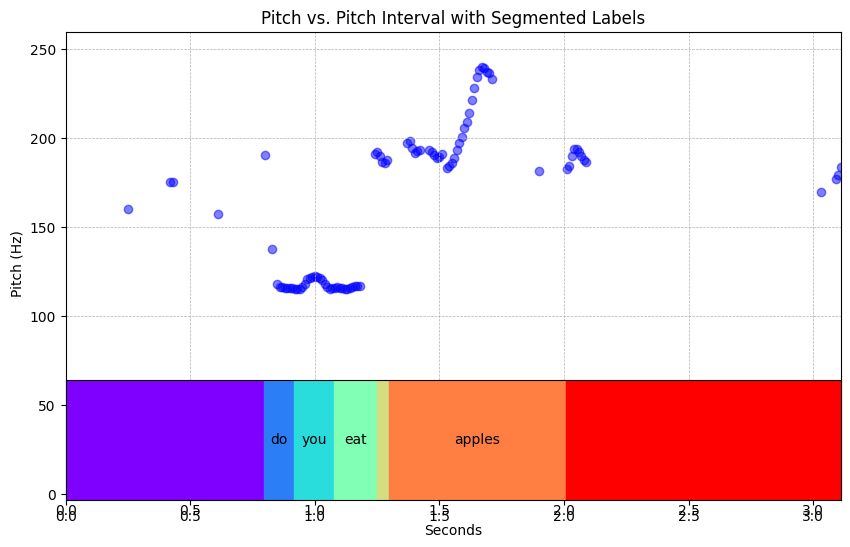

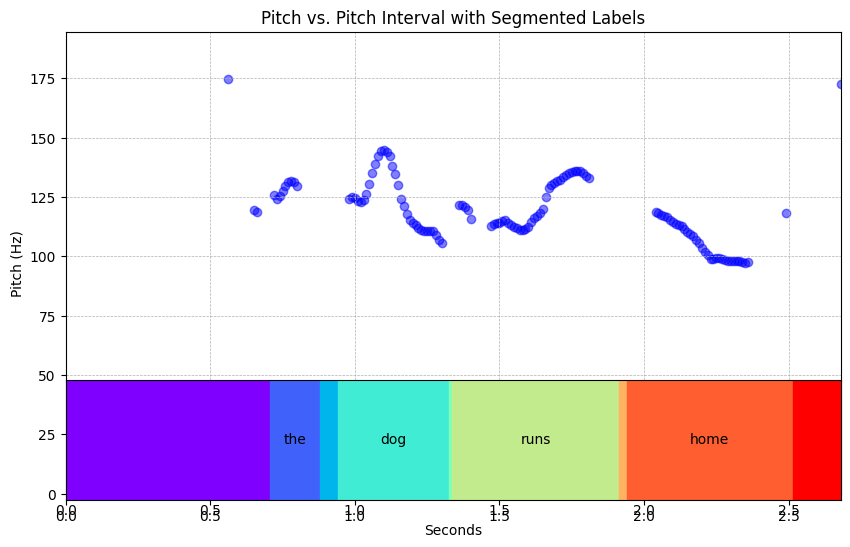

In [91]:
graph_audios(data_50)

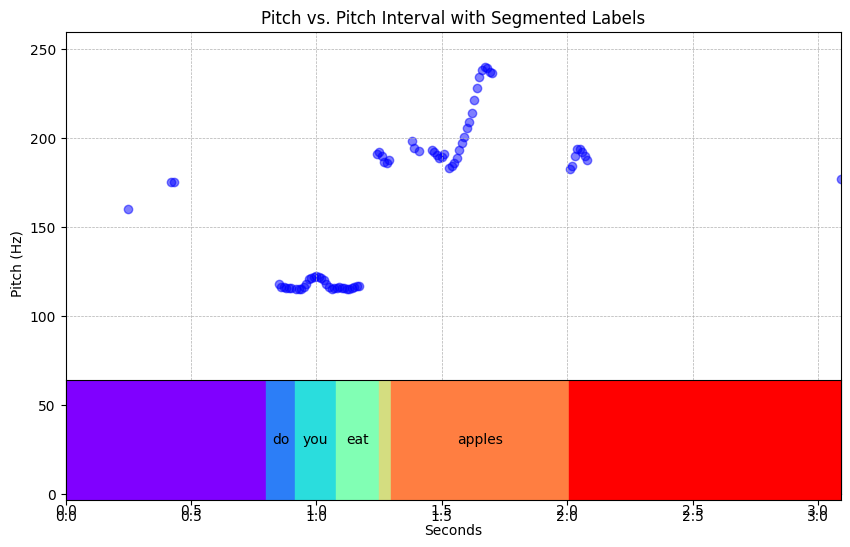

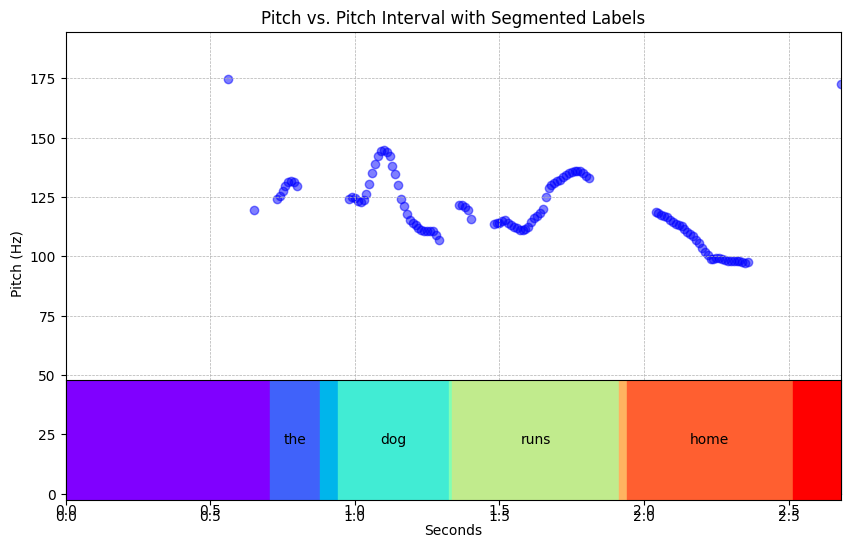

In [92]:
graph_audios(data_60)

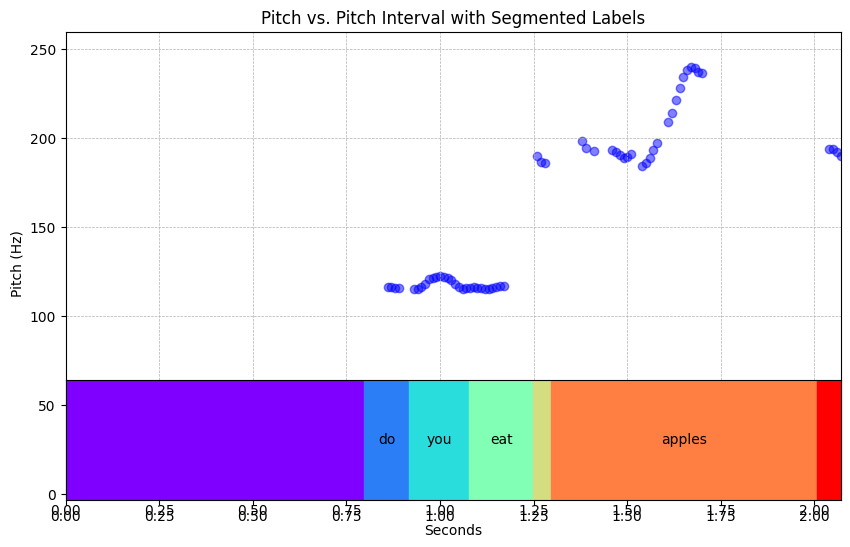

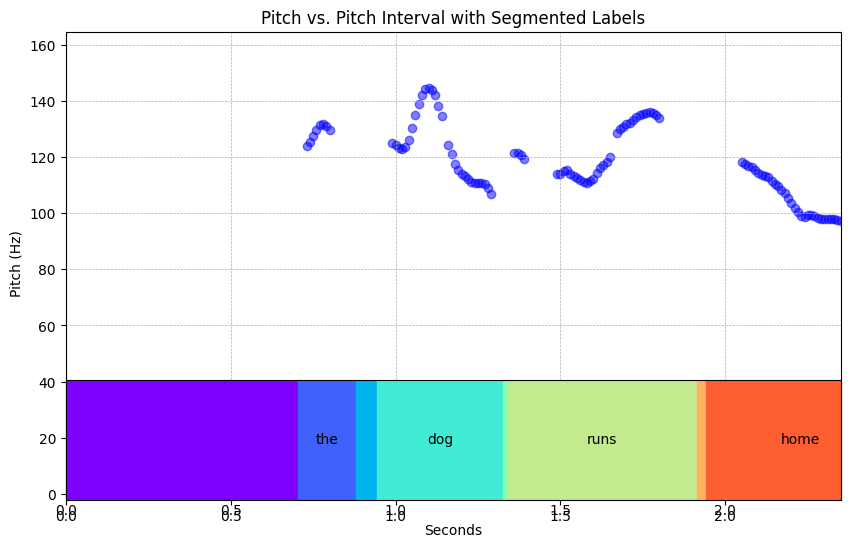

In [93]:
graph_audios(data_70)